## Import necessary libraries

In [23]:
import numpy as np
import pandas as pd
import scipy.optimize as opt
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

## Load the Data
The dataset consists of several hundred human cell sample records, each of which contains the values of a set of cell characteristics. For the purposes of this example, we're using a dataset that has a relatively small number of predictors in each record.

In [24]:
data_raw = pd.read_csv('./data/cell_samples.csv')
data_raw.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


We can see that the dataset is formed of: ID, Clump, UnifSize, UnifShape, MargAdh, SingEpiSize, BareNuc, BlandChrom, NormNucl, Mit and Class.
Values are graded from 1 to 10, 1 being the closest to benign.
The Class can be either 2 or 4, 2 being benign and 4 being malign.


Let's look at the distribution of classes based on Clump and UnifSize.

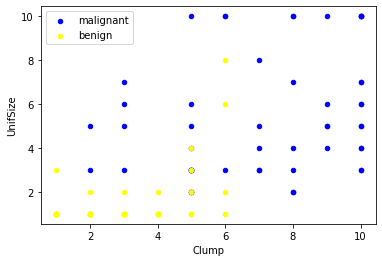

In [25]:
# Malign
ax = data_raw[data_raw['Class'] == 4][0:50].plot(kind = 'scatter', x = 'Clump', y = 'UnifSize', color = 'blue', label = 'malignant')

# Benign
data_raw[data_raw['Class'] == 2][0:50].plot(kind = 'scatter', x = 'Clump', y = 'UnifSize', color = 'yellow', label = 'benign', ax = ax)

plt.show()

## Data Processing and selection

In [26]:
data_raw.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

We can see that BareNuc is not an integer, so we have to transform it

In [27]:
data_raw = data_raw[pd.to_numeric(data_raw['BareNuc'], errors = 'coerce').notnull()]
data_raw['BareNuc'] = data_raw['BareNuc'].astype('int64')
data_raw.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

Perfect, now we can select the properties we want

In [31]:
data_features = data_raw[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
data = np.asarray(data_features)
data[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]], dtype=int64)

We can put our answers in another array

In [32]:
data_raw['Class'] = data_raw['Class'].astype('int64')
answer = np.asarray(data_raw['Class'])
answer[0:5]

array([2, 2, 2, 2, 2], dtype=int64)

## Train / Test
### Create datasets

In [33]:
# Requirement
from sklearn.model_selection import train_test_split as tts

# Create sets
x_train, x_test, y_train, y_test = tts(data, answer, test_size = 0.2, random_state = 4)

# Show sets
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (546, 9) (546,)
Test set: (137, 9) (137,)


## Modeling (SVM)

The SVM algorithm offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimensional space is called kernelling. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:

1.Linear
<br>
2.Polynomial
<br>
3.Radial basis function (RBF)
<br>
4.Sigmoid

Each of these functions has its characteristics, its pros and cons, and its equation, but as there's no easy way of knowing which function performs best with any given dataset, we usually choose different functions in turn and compare the results.

### Requirement

In [36]:
from sklearn import svm

#### Linear

In [43]:
model_linear = svm.SVC(kernel = 'linear')
model_linear.fit(x_train, y_train)

SVC(kernel='linear')

#### Polynomial

In [44]:
model_poly = svm.SVC(kernel = 'poly')
model_poly.fit(x_train, y_train)

SVC(kernel='poly')

#### RBF (Radial Basis Function)

In [45]:
model_rbf = svm.SVC(kernel = 'rbf')
model_rbf.fit(x_train, y_train)

SVC()

#### Sigmoid

In [46]:
model_sigmoid = svm.SVC(kernel = 'sigmoid')
model_sigmoid.fit(x_train, y_train)

SVC(kernel='sigmoid')

### Evaluate

We can now evaluate every one of them to the test sets

#### Linear

In [48]:
predict_linear = model_linear.predict(x_test)
predict_linear[0:5]

array([2, 4, 2, 4, 2], dtype=int64)

#### Polynomial

In [49]:
predict_poly = model_poly.predict(x_test)
predict_poly[0:5]

array([2, 4, 2, 4, 2], dtype=int64)

#### RBF

In [50]:
predict_rbf = model_rbf.predict(x_test)
predict_rbf[0:5]

array([2, 4, 2, 4, 2], dtype=int64)

#### Sigmoid

In [51]:
predict_sigmoid = model_sigmoid.predict(x_test)
predict_sigmoid[0:5]

array([2, 2, 2, 2, 2], dtype=int64)

Except for the sigmoid, they all had the same results for the first 5 test querries. Now we can evaluate them.

## Evaluate

### Requirements

In [52]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

### Confusion Matrix
This function prints and plots the confusion matrix.
Normalization can be applied by setting `normalize=True`.

In [54]:
def plot_confusion_matrix(cm, classes, normalize = False, title = 'Confusion matrix', cmap = plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

We now have to compute this graph for every one of the models

#### Linear

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

Confusion matrix, without normalization
[[85  5]
 [ 0 47]]


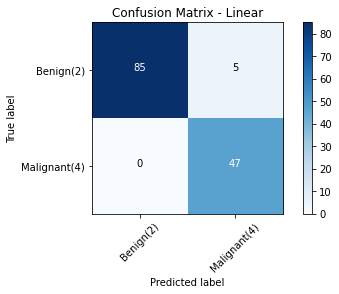

In [55]:
conf_matrix_linear = confusion_matrix(y_test, predict_linear, labels = [2,4])
np.set_printoptions(precision = 2)

print(classification_report(y_test, predict_linear))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf_matrix_linear, classes = ['Benign(2)', 'Malignant(4)'], normalize = False, title='Confusion Matrix - Linear')

#### Polynomial

              precision    recall  f1-score   support

           2       1.00      0.96      0.98        90
           4       0.92      1.00      0.96        47

    accuracy                           0.97       137
   macro avg       0.96      0.98      0.97       137
weighted avg       0.97      0.97      0.97       137

Confusion matrix, without normalization
[[86  4]
 [ 0 47]]


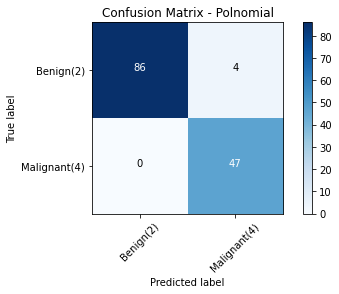

In [57]:
conf_matrix_poly = confusion_matrix(y_test, predict_poly, labels = [2,4])
np.set_printoptions(precision = 2)

print(classification_report(y_test, predict_poly))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf_matrix_poly, classes = ['Benign(2)', 'Malignant(4)'], normalize = False, title='Confusion Matrix - Polnomial')

#### RBF

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

Confusion matrix, without normalization
[[85  5]
 [ 0 47]]


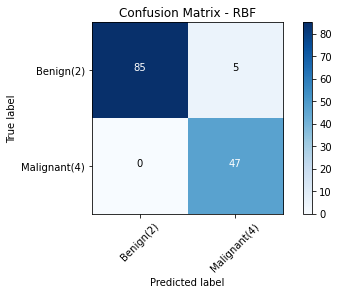

In [58]:
conf_matrix_rbf = confusion_matrix(y_test, predict_rbf, labels = [2,4])
np.set_printoptions(precision = 2)

print(classification_report(y_test, predict_rbf))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf_matrix_rbf, classes = ['Benign(2)', 'Malignant(4)'], normalize = False, title='Confusion Matrix - RBF')

#### Sigmoid

              precision    recall  f1-score   support

           2       0.53      0.60      0.57        90
           4       0.00      0.00      0.00        47

    accuracy                           0.39       137
   macro avg       0.27      0.30      0.28       137
weighted avg       0.35      0.39      0.37       137

Confusion matrix, without normalization
[[54 36]
 [47  0]]


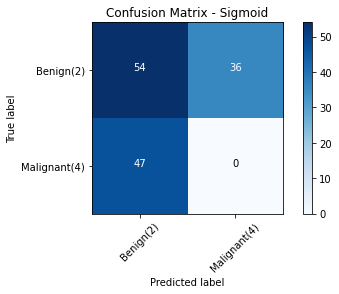

In [60]:
conf_matrix_sigmoid = confusion_matrix(y_test, predict_sigmoid, labels = [2,4])
np.set_printoptions(precision = 2)

print(classification_report(y_test, predict_sigmoid))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf_matrix_sigmoid, classes = ['Benign(2)', 'Malignant(4)'], normalize = False, title='Confusion Matrix - Sigmoid')

- We can see that the Sigmoid function had a total of 83 wrong calls and 54 right calls, making it the worst method for this case.
<br>
- Both Linear and RBF had the same results, 5 wrong calls and 132 right calls.
<br>
- The Polynomial kernel was the best one, but for little, it had 4 wrong calls and 133 right calls.

We can also use F1 Score to determine the best method
### F1 Score

In [70]:
from sklearn.metrics import f1_score

#### Linear

In [71]:
f1_score(y_test, predict_linear, average = 'weighted')

0.9639038982104676

#### Polynomial

In [72]:
f1_score(y_test, predict_poly, average = 'weighted')

0.9710669934861801

#### RBF

In [73]:
f1_score(y_test, predict_rbf, average = 'weighted')

0.9639038982104676

#### Sigmoid

In [74]:
f1_score(y_test, predict_sigmoid, average = 'weighted')

0.3714602361753353

### Results

1. Polynomial (F1 Score of 97.10%)
2. Linear and Polynomial (F1 Score of 96.39%)
3. Sigmoid (F1 Score of 37.14%)

We can conclude that, for this case, it's not worth using a sigmoid kernel, and the best one is polynomial, although for little.